In [1]:
import scanpy as sc
import pandas as pd

[Executed on 2023-12-06 13:03:54.331743]


In [2]:
adata=sc.read_h5ad('/proj/sensoryaging/60_plates_data/Sgns/two_neuron_merged.h5ad')

[Executed on 2023-12-06 13:04:16.474525]


In [3]:
adata

[Executed on 2023-12-06 13:04:17.674247]


AnnData object with n_obs × n_vars = 203 × 30819
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'age', 'platesID', 'n_counts', 'leiden_1'
    var: 'mean-0', 'std-0', 'highly_variable-0-0', 'highly_variable_rank-0-0', 'means-0-0', 'variances-0-0', 'variances_norm-0-0', 'highly_variable-1-0', 'highly_variable_rank-1-0', 'means-1-0', 'variances-1-0', 'variances_norm-1-0', 'mean-1', 'std-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leide

In [4]:
adata.obs['cell_type'].value_counts()

[Executed on 2023-12-06 13:06:15.562267]


cell_type
Type_1C_neuron    56
Type_1A_neuron    54
type_1A_neuron    22
type_1C_neuron    22
Type_1B_neuron    19
type_1B_neuron    18
Type_2_neuron      8
type_2_neuron      4
Name: count, dtype: int64

In [7]:
import pandas as pd

# Assuming adata is your AnnData object

# Create a dictionary to map cell types to groups
cell_type_to_group = {
    'Type_1A_neuron': 'Type1A',
    'type_1A_neuron': 'Type1A',
    'Type_1B_neuron': 'Type1B',
    'type_1B_neuron': 'Type1B',
    'Type_1C_neuron': 'Type1C',
    'type_1C_neuron': 'Type1C',
    'Type_2_neuron': 'Type2',
    'type_2_neuron': 'Type2'
}

# Map cell types to groups and create a new 'group' column
adata.obs['neuron'] = adata.obs['cell_type'].map(cell_type_to_group)

# Check the value counts of the new 'group' column
print(adata.obs['neuron'].value_counts())


[Executed on 2023-12-06 13:09:43.192093]
neuron
Type1C    78
Type1A    76
Type1B    37
Type2     12
Name: count, dtype: int64


In [28]:
adata.obs['neuron']=adata.obs['neuron'].astype(str)


[Executed on 2023-12-06 13:16:50.019324]


In [32]:
type2=adata[adata.obs['neuron']=='Type2',:]

[Executed on 2023-12-06 13:17:29.541916]


In [33]:
type2

[Executed on 2023-12-06 13:17:30.814149]


View of AnnData object with n_obs × n_vars = 12 × 30819
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'age', 'platesID', 'n_counts', 'leiden_1', 'neuron'
    var: 'mean-0', 'std-0', 'highly_variable-0-0', 'highly_variable_rank-0-0', 'means-0-0', 'variances-0-0', 'variances_norm-0-0', 'highly_variable-1-0', 'highly_variable_rank-1-0', 'means-1-0', 'variances-1-0', 'variances_norm-1-0', 'mean-1', 'std-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg',

In [34]:
type2
type2.write_h5ad('/proj/sensoryaging/60_plates_data/Sgns/type2.h5ad')

[Executed on 2023-12-06 13:17:32.066252]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/anndata/_core/anndata.py:1292: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


[Executed on 2023-12-06 13:21:18.124016]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_ol

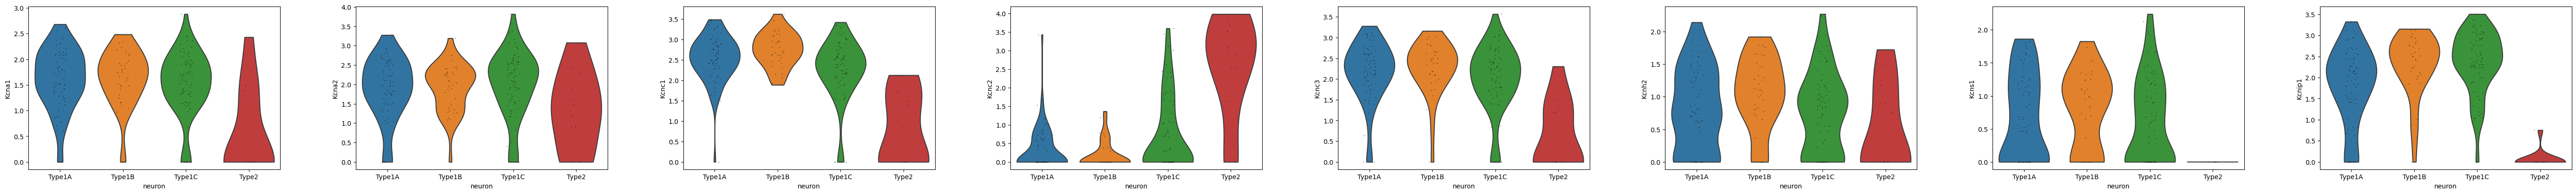

In [38]:
sc.pl.violin(adata,keys=['Kcna1','Kcna2','Kcnc1','Kcnc2','Kcnc1','Kcnc2','Kcnc3','Kcnh2','Kcns1','Kcnip1'],groupby='neuron',layer='log1p')

In [41]:
gene_list=['Kcna1','Kcna2','Kcnc1','Kcnc2','Kcnc1','Kcnc2','Kcnc3','Kcnh2','Kcns1','Kcnip1','Kcnip2','Kcnab2','Kcnab3','Scn1a','Scn1b','Scn4b','Scn8a','Hcn1','Hcn2','Kcnq2','Kcnq1','Kcnq3','Kcnq4','Kcnq5','Pou4f1','Runx1','Lypd1','Calb2','Calb1','Grm8']

[Executed on 2023-12-06 13:28:21.932382]


In [42]:
#check if the gene is in the adata
for gene in gene_list:
    if gene not in adata.var_names:
        print(gene)

[Executed on 2023-12-06 13:28:22.419995]


In [50]:
type1A.obs['age']=type1A.obs['age'].cat.reorder_categories(['youth','old'])

[Executed on 2023-12-06 13:39:02.601280]


[Executed on 2023-12-06 14:04:36.147669]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_ol

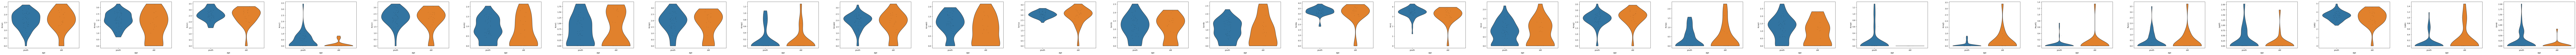

In [73]:
sc.pl.violin(type1A, keys=gene_list, groupby='age', layer='log1p', ncols=5, nrows=6)


In [55]:
def stack_vln(adata: sc.AnnData, markers: list, groupby: str, layer: str, figsize: tuple = (5, 8), pad: float = -0.5, **kwds):
    fig, ax = plt.subplots(len(markers), 1, figsize=figsize)
    ax = ax.ravel()
    for i, g in enumerate(markers):
        sc.pl.violin(adata, keys=g, groupby=groupby, layer=layer, ax=ax[i], show=False, **kwds)
        ax[i].grid(False)
        if i + 1 < len(markers):
            ax[i].set_xlabel('')
            ax[i].set_xticks([])
    fig.tight_layout(pad=pad)
    return fig, ax


[Executed on 2023-12-06 13:46:54.654516]


[Executed on 2023-12-06 15:54:13.833354]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_ol

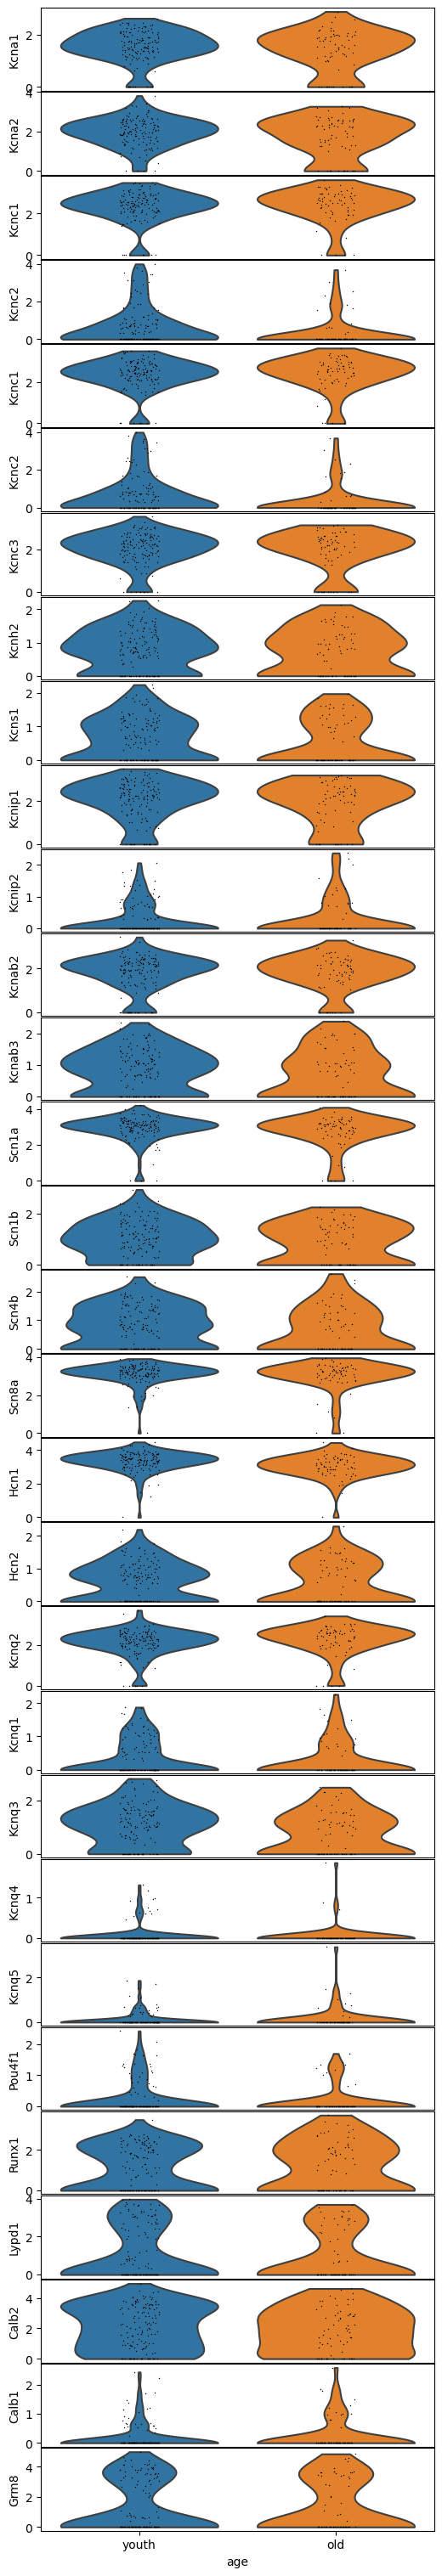

In [114]:
import scanpy as sc
import matplotlib.pyplot as plt

# Call the stack_vln function
fig, ax = stack_vln(adata, gene_list, groupby='age', layer='log1p', figsize=(5, 30), pad=-0.5)

# Show the plot
plt.show()


In [90]:
type2.obs['age']=type2.obs['age'].cat.reorder_categories(['youth','old'])

[Executed on 2023-12-06 14:12:58.951379]


[Executed on 2023-12-06 16:10:54.948159]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_ol

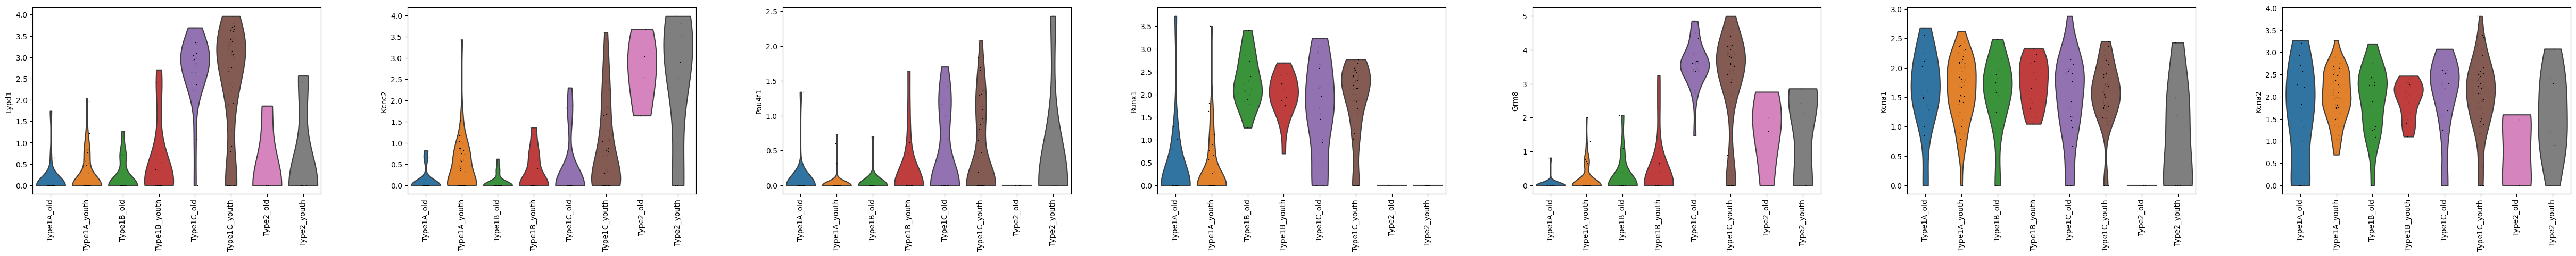

In [128]:
sc.pl.violin(adata, keys=['Lypd1','Kcnc2','Pou4f1','Runx1','Grm8','Kcna1','Kcna2'], groupby='Neruon_age', layer='log1p', ncols=6, nrows=6,rotation=90)


[Executed on 2023-12-06 16:12:57.579786]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_ol

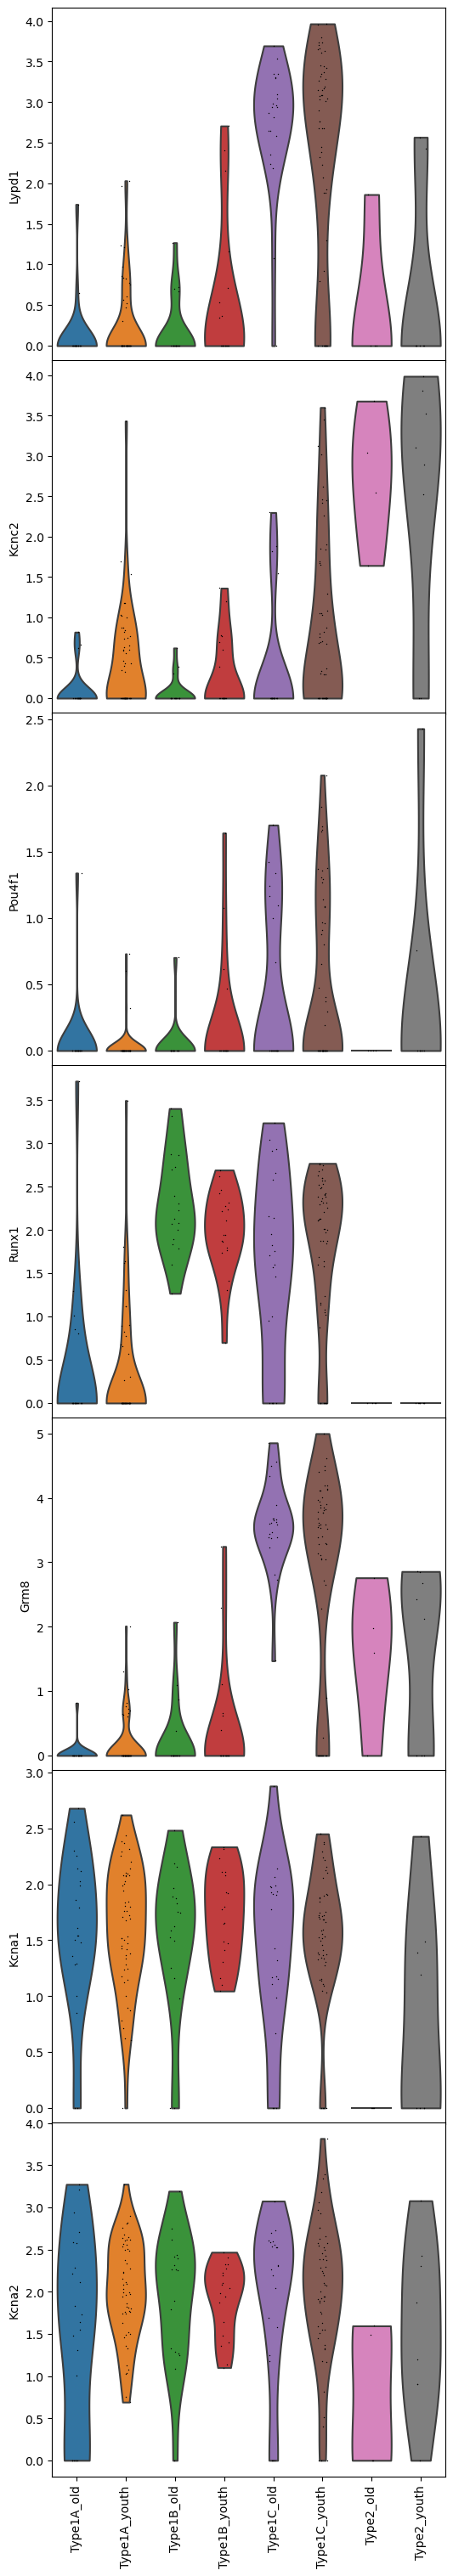

In [130]:
import scanpy as sc
import matplotlib.pyplot as plt

# Call the stack_vln function
fig, ax = stack_vln(adata, ['Lypd1','Kcnc2','Pou4f1','Runx1','Grm8','Kcna1','Kcna2'], groupby='Neruon_age', layer='log1p', figsize=(5, 30), pad=-0.5,rotation=90)

# Show the plot
plt.show()

In [121]:
adata

[Executed on 2023-12-06 16:03:29.013927]


AnnData object with n_obs × n_vars = 203 × 30819
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'age', 'platesID', 'n_counts', 'leiden_1', 'neuron', 'Neruon_age'
    var: 'mean-0', 'std-0', 'highly_variable-0-0', 'highly_variable_rank-0-0', 'means-0-0', 'variances-0-0', 'variances_norm-0-0', 'highly_variable-1-0', 'highly_variable_rank-1-0', 'means-1-0', 'variances-1-0', 'variances_norm-1-0', 'mean-1', 'std-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns:

In [131]:
adata.write_h5ad('/proj/sensoryaging/60_plates_data/Sgns/two_neuron_merged.h5ad')

[Executed on 2023-12-06 16:18:29.233849]


[Executed on 2023-12-06 16:05:25.702766]


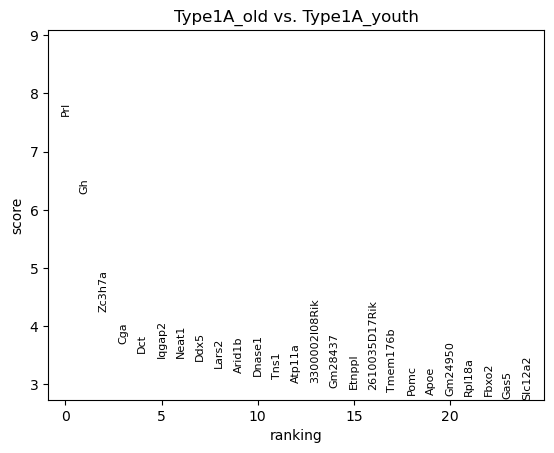

In [124]:
sc.tl.rank_genes_groups(adata, groupby='Neruon_age', method='t-test_overestim_var', layer='log1p', reference='Type1A_youth',groups=['Type1A_old'], key_added='Type1A')
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False, key='Type1A')

In [125]:
a=sc.get.rank_genes_groups_df(adata, group=None,key='Type1A',pval_cutoff=0.05)
a

[Executed on 2023-12-06 16:06:06.133351]


,names,scores,logfoldchanges,pvals,pvals_adj
0,Prl,7.622485,9.625954,1.677219e-07,1.033805e-03
1,Gh,6.269852,11.736899,3.211365e-06,1.413872e-02
2,Gm47135,-6.491626,-30.294033,1.970140e-06,1.011962e-02
3,Ppp4r1l-ps,-7.968436,-31.043386,8.773611e-08,6.759848e-04
4,2610005L07Rik,-19.563841,-6.004183,2.242003e-20,3.454814e-16
5,6820431F20Rik,-26.994209,-7.131259,9.397278e-25,2.896147e-20
6,Tmem181b-ps,-27.200615,-9.132756,4.134480e-19,4.247351e-15


In [81]:
type1A

[Executed on 2023-12-06 14:09:39.197509]


AnnData object with n_obs × n_vars = 76 × 30819
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'age', 'platesID', 'n_counts', 'leiden_1', 'neuron'
    var: 'mean-0', 'std-0', 'highly_variable-0-0', 'highly_variable_rank-0-0', 'means-0-0', 'variances-0-0', 'variances_norm-0-0', 'highly_variable-1-0', 'highly_variable_rank-1-0', 'means-1-0', 'variances-1-0', 'variances_norm-1-0', 'mean-1', 'std-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden

In [92]:
youth=sc.read_h5ad("/proj/sensoryaging/data/data/up_dated_data/SGNs/FINAL_AFTER_11.7/known_cluster.h5ad")
youth

[Executed on 2023-12-06 15:01:35.713166]


AnnData object with n_obs × n_vars = 1722 × 33241
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R'
    var: 'mean', 'std', 'highly_variable-0', 'highly_variable_rank-0', 'means-0', 'variances-0', 'variances_norm-0', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1'
    uns: 'cell_type_colors', 'leiden', 'leiden_2_colors', 'leiden_colors', 'leiden_no_osteocytes_colors', 'neighbors', 'pca', 'rank_genes_groups', 'umap'
    obsm: 'X_pca', 'X_umap', 'X_umapOriginal', 'X_umap_10.27'
    varm: 'PCs'
    layers: 'Scale', 'log1p', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-12-06 15:02:21.215530]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


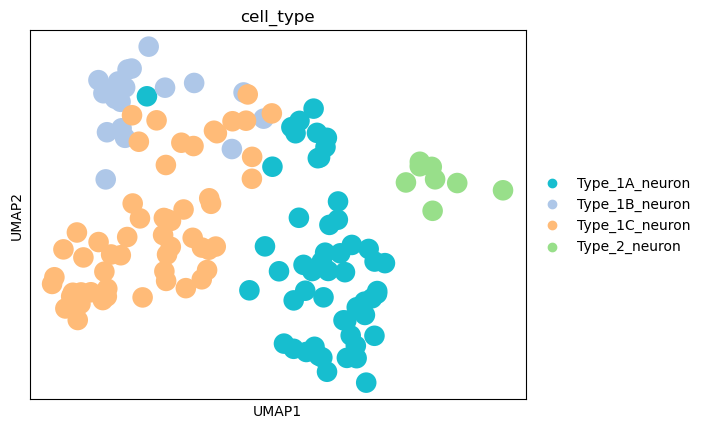

In [93]:
youth=youth[youth.obs['cell_type'].str.contains('neuron')]
sc.pl.umap(youth,color='cell_type')

[Executed on 2023-12-06 15:15:35.958223]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


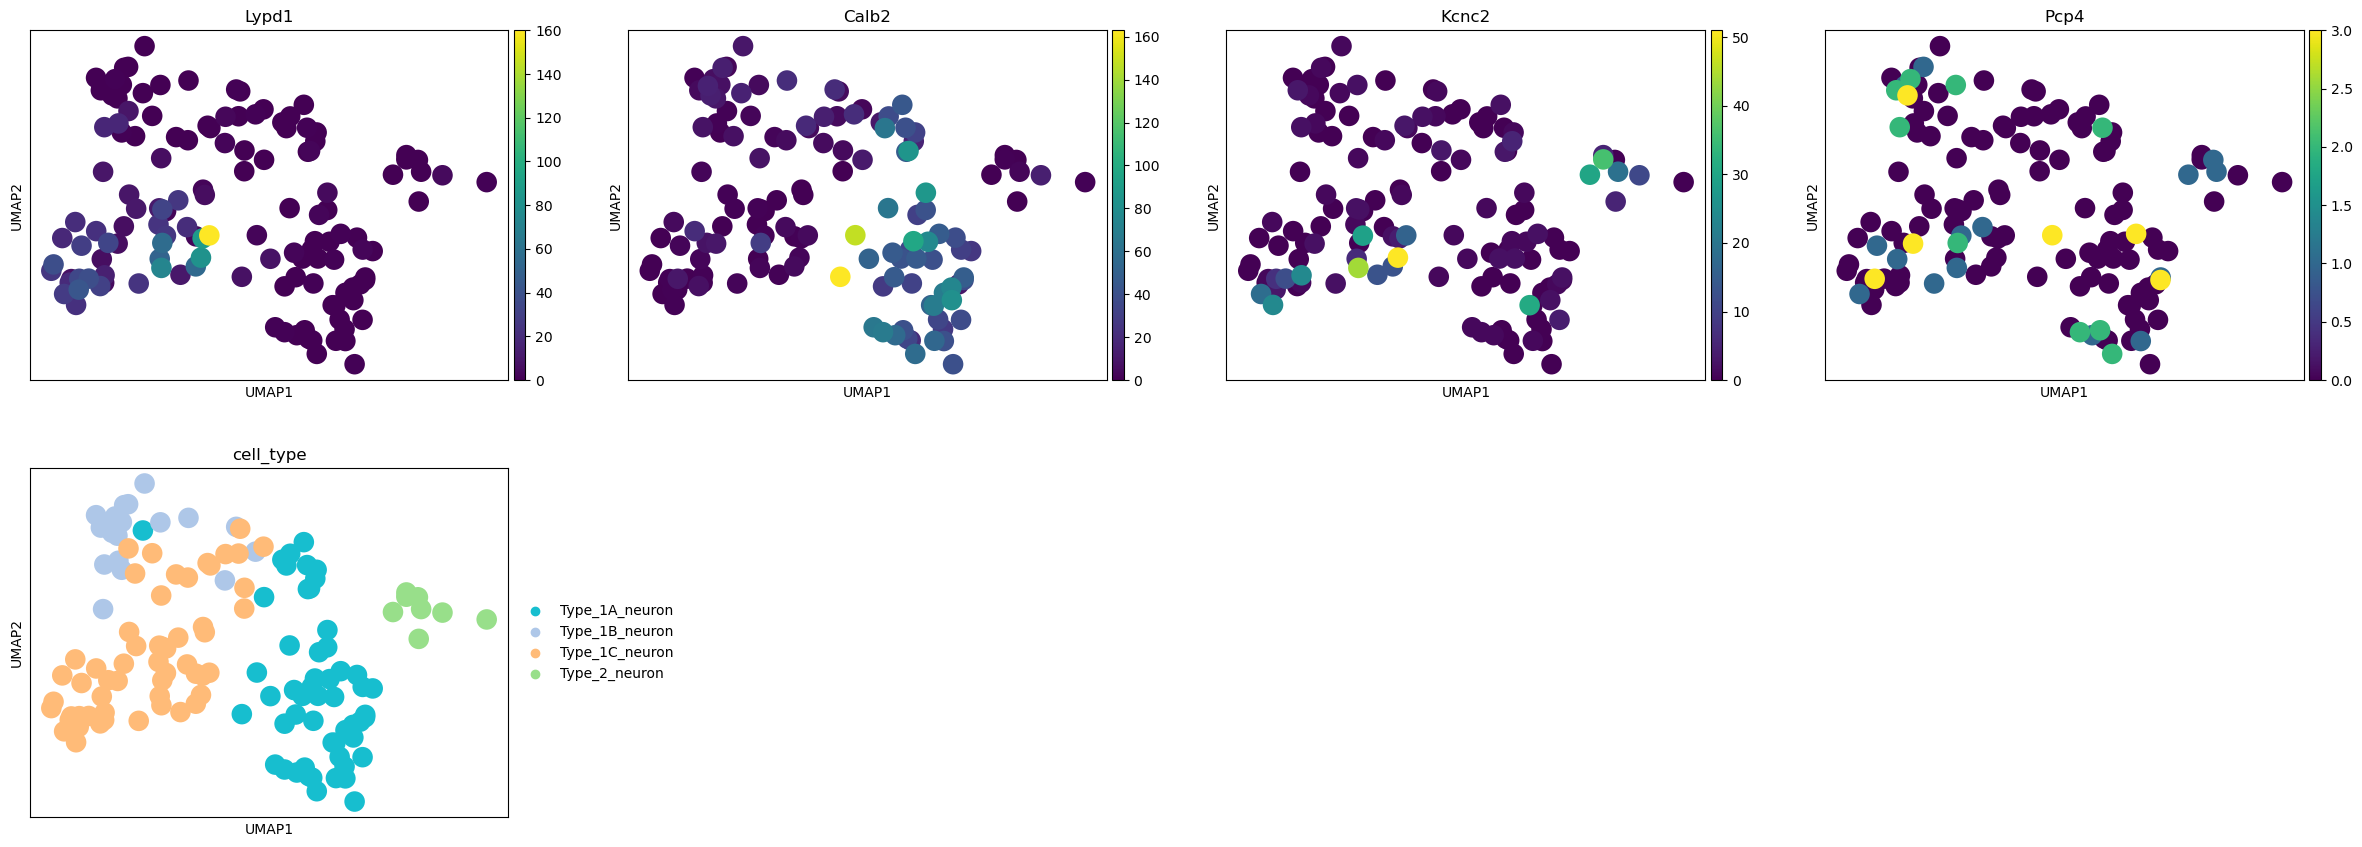

In [101]:
sc.pl.umap(youth,color=['Lypd1','Calb2','Kcnc2','Pcp4','cell_type'],layer='umi')

In [105]:
adata

[Executed on 2023-12-06 15:21:11.212313]


AnnData object with n_obs × n_vars = 203 × 30819
    obs: 'sample_ID_Plate', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'doublet_scores', 'predicted_doublets', 'sex', 'leiden_new', 'leiden_old', 'leiden_0', 'leiden_2', 'cell_type', 'leiden_no_osteocytes', 'gp0', 'gp1', 'gp2', 'gp3', 'gp4', 'gp5', 'gp6', 'leiden_R', 'age', 'platesID', 'n_counts', 'leiden_1', 'neuron'
    var: 'mean-0', 'std-0', 'highly_variable-0-0', 'highly_variable_rank-0-0', 'means-0-0', 'variances-0-0', 'variances_norm-0-0', 'highly_variable-1-0', 'highly_variable_rank-1-0', 'means-1-0', 'variances-1-0', 'variances_norm-1-0', 'mean-1', 'std-1', 'n_cells-1', 'mt-1', 'n_cells_by_counts-1', 'mean_counts-1', 'pct_dropout_by_counts-1', 'total_counts-1', 'highly_variable-1', 'highly_variable_rank-1', 'means-1', 'variances-1', 'variances_norm-1', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leide

[Executed on 2023-12-06 15:24:38.964751]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(val

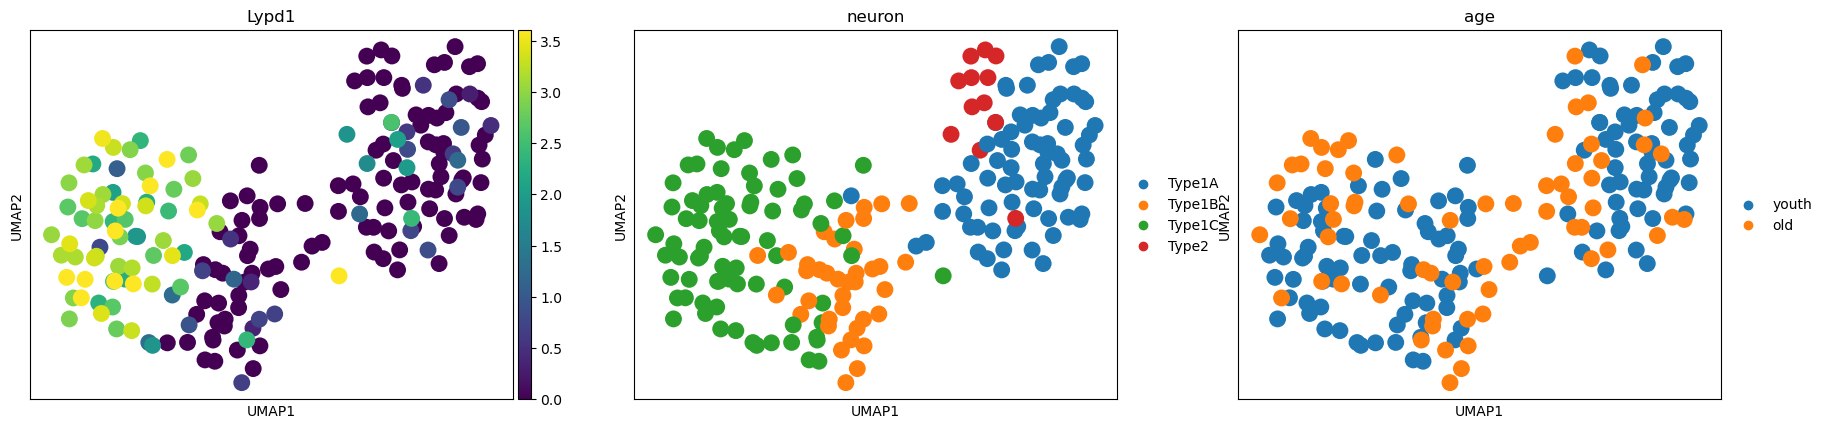

In [110]:
sc.pl.umap(adata,color=['Lypd1','neuron','age'],layer='log1p',vmax='p95')

In [117]:
adata.obs['Neruon_age']=adata.obs['neuron'].astype(str)+'_'+adata.obs['age'].astype(str)

[Executed on 2023-12-06 15:58:49.207240]


In [134]:
#a.write_h5ad("/proj/sensoryaging/60_plates_data/Human_data/data_process/First_UMAP.h5ad")
a=sc.read_h5ad("/proj/sensoryaging/60_plates_data/Human_data/data_process/First_UMAP.h5ad")
a

[Executed on 2023-12-06 16:21:16.760482]


AnnData object with n_obs × n_vars = 2581 × 58035
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'leiden', 'leiden_colors', 'log1p', 'neighbors', 'pca', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'log1p', 'read', 'scale', 'umi'
    obsp: 'connectivities', 'distances'

[Executed on 2023-12-06 16:24:20.720911]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


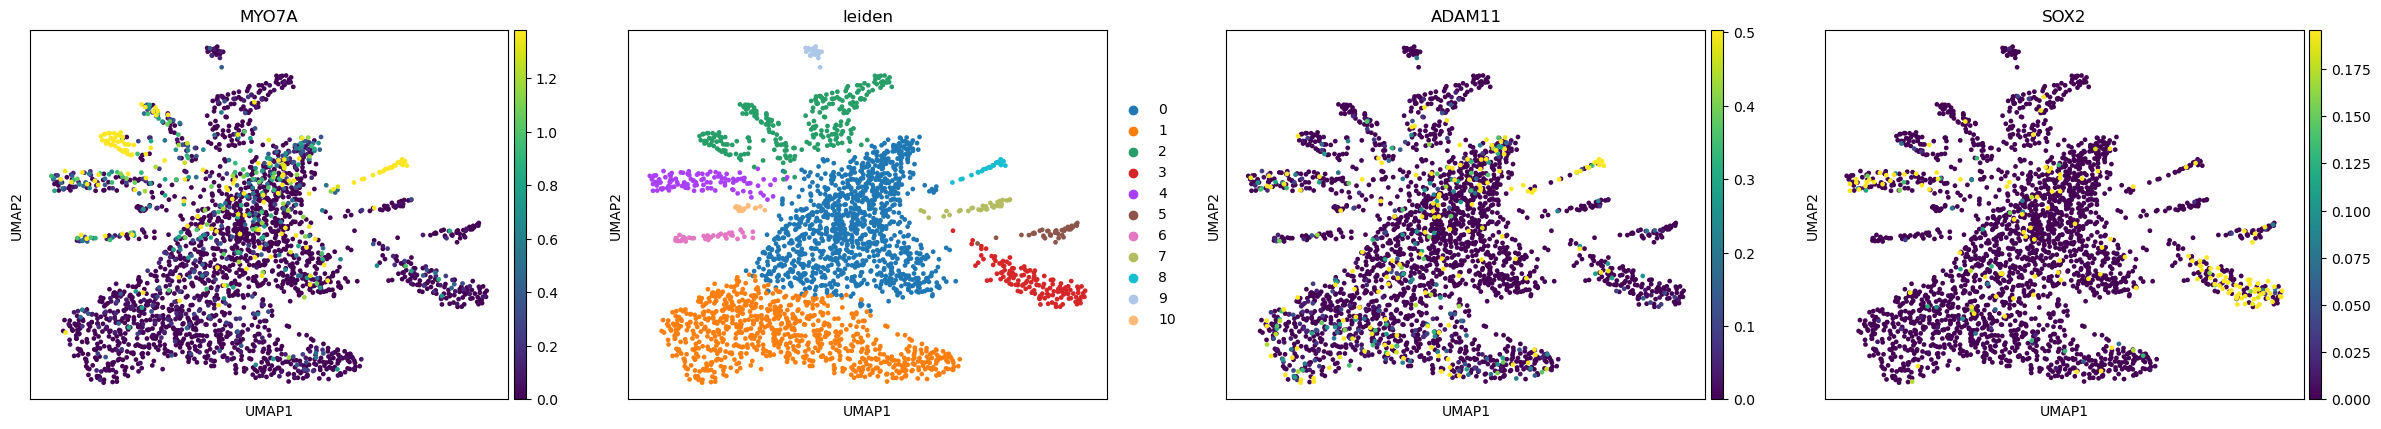

In [141]:
sc.pl.umap(a,color=['MYO7A','leiden','ADAM11','SOX2'],layer='log1p',vmax='p95')